In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from pprint import pprint

In [32]:
end_files = glob('*end.out')

df_end = pd.concat([pd.read_csv(file, sep=' ') for file in end_files], ignore_index=True)
if len(end_files) > 1:
    df_end['particle'] = df_end['particle']+df_end['jobnumber']*df_end['particle'].max()
df_end.head()

,jobnumber,particle,tstart,xstart,ystart,zstart,vxstart,vystart,vzstart,polstart,...,Uend,solidend,stopID,Nspinflip,spinflipprob,Nhit,Nstep,trajlength,Hmax,wL
0,0,1,0,3.899872,-0.030436,0.250088,0.088425,0.902625,4.176243,-1,...,0,3,1,0,0,233,283,15.691892,1.211016e-07,5251.868975
1,0,2,0,3.899014,0.007340,0.216774,3.789956,-1.830438,-0.395213,-1,...,0,3,1,0,0,89,114,6.556587,1.156316e-07,5284.482734
2,0,3,0,3.900259,0.010706,0.213854,-0.990250,-0.573054,4.164205,-1,...,0,3,1,0,0,63,74,4.072674,1.194048e-07,5126.579007
3,0,4,0,3.897254,-0.006204,0.256566,-3.230813,-4.018849,1.251539,-1,...,0,3,1,0,0,534,556,32.072128,1.734721e-07,5089.369025
4,0,5,0,3.904953,0.011406,0.222336,-4.806775,-1.832955,-0.046686,-1,...,0,3,1,0,0,1099,1221,78.224783,1.611362e-07,5290.555106


2.05619422441162

In [33]:
snap_files = glob('*snapshot.out')
df_snap = pd.concat([pd.read_csv(file, sep=' ') for file in snap_files], ignore_index=True)

if len(snap_files) > 1:
    df_snap['particle'] = df_snap['particle']+df_snap['jobnumber']*df_snap['particle'].max()
df_snap.head()

,jobnumber,particle,tstart,xstart,ystart,zstart,vxstart,vystart,vzstart,polstart,...,Uend,solidend,stopID,Nspinflip,spinflipprob,Nhit,Nstep,trajlength,Hmax,wL
0,0,1,0,3.899872,-0.030436,0.250088,0.088425,0.902625,4.176243,-1,...,0,1,0,0,0,1,1,0.000000,0.000000e+00,0.000000
1,0,1,0,3.899872,-0.030436,0.250088,0.088425,0.902625,4.176243,-1,...,0,1,0,0,0,14,15,0.430920,1.211016e-07,4693.581386
2,0,1,0,3.899872,-0.030436,0.250088,0.088425,0.902625,4.176243,-1,...,0,1,0,0,0,29,30,0.861894,1.211016e-07,4691.385420
3,0,1,0,3.899872,-0.030436,0.250088,0.088425,0.902625,4.176243,-1,...,0,1,0,0,0,36,39,1.292511,1.211016e-07,4695.491829
4,0,1,0,3.899872,-0.030436,0.250088,0.088425,0.902625,4.176243,-1,...,0,1,0,0,0,42,45,1.724291,1.211016e-07,4696.257605


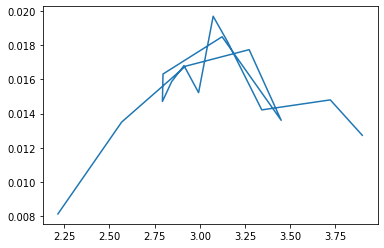

0.00505389429967056


In [34]:
particle_id = 2
df_snap_1= df_snap[df_snap['particle']==particle_id]
plt.plot(df_snap_1['xend'], df_snap_1['Szend'])
plt.show()
print(df_end[df_end['particle']==particle_id]['Szend'].item())

435 particles with average S_z = 0.004659836829527147
Magnetic field Max: 3.23480228606271e-05   Min: 3.22740184684961e-05   Mean: 3.231044835843286e-05


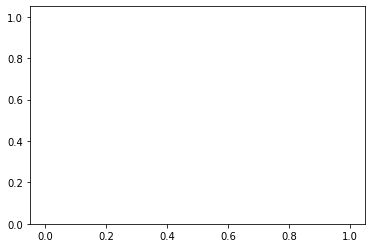

In [35]:
df_end_ab = df_end[df_end['stopID']==1]
print('{} particles with average S_z = {}'.format(len(df_end_ab), df_end_ab['Szend'].mean()))
print('Magnetic field Max: {}   Min: {}   Mean: {}'.format(df_end_ab['Bend'].max(), df_end_ab['Bend'].min(), df_end_ab['Bend'].mean()))

plt.hist(df_end_ab['Szend'], range=(-1.0,-.9), bins=25, density=True)
plt.show()

In [36]:
track_files = glob('*track.out')
df_track = pd.concat([pd.read_csv(file, sep=' ') for file in track_files], ignore_index=True)

if len(track_files) > 1:
    df_track['particle'] = df_spin['particle']+df_spin['jobnumber']*df_spin['particle'].max()
df_track.head()

,jobnumber,particle,polarisation,t,x,y,z,vx,vy,vz,...,dBydy,dBydz,Bz,dBzdx,dBzdy,dBzdz,Ex,Ey,Ez,V
0,0,1.0,-1,0.000000,3.899872,-0.030436,0.250088,0.088425,0.902625,4.176243,...,-0.000001,1.096197e-07,-3.767927e-07,8.837556e-08,1.805073e-07,-0.000001,0,0,0,0
1,0,1.0,-1,0.007590,3.900543,-0.004597,0.266933,0.088424,3.790711,1.885701,...,-0.000001,-1.635376e-08,-4.022697e-07,5.962975e-08,1.963950e-08,-0.000002,0,0,0,0
2,0,1.0,-1,0.019860,3.901628,0.035366,0.239573,0.088424,-2.320681,-3.616131,...,-0.000002,-4.017095e-09,-3.604305e-07,1.219675e-07,7.013721e-09,-0.000002,0,0,0,0
3,0,1.0,-1,0.030812,3.902596,0.009950,0.199381,0.088424,-4.273905,0.991964,...,-0.000002,-3.650443e-09,-2.994766e-07,1.215150e-07,2.016829e-09,-0.000002,0,0,0,0
4,0,1.0,-1,0.038608,3.903286,-0.023367,0.206816,0.088424,-1.990489,3.891322,...,-0.000002,-3.045556e-09,-3.107166e-07,1.221964e-07,1.646497e-09,-0.000002,0,0,0,0


In [40]:
df_track.polarisation.nunique()

1

In [37]:
df_track['pol'] = df_track.apply(lambda row: np.dot( row[['Sx','Sy','Sz']], row[['Bx','By','Bz']] ) / np.linalg.norm( row[['Bx','By','Bz']] ) , axis=1)

KeyError: "None of [Index(['Sx', 'Sy', 'Sz'], dtype='object')] are in the [index]"

In [38]:
fig, ax = plt.subplots(1)

ax.set_title('Amount of Depolarization vs. X Position')
ax.set_xlabel('X')
ax.set_ylabel('Depolarization')
ax.hist(df_track['x'],weights=df_track['pol'].diff().fillna(0), bins=50, range=(2,3.75))
ax.ticklabel_format(style='sci',useOffset=False)
ax.set_xticks(np.arange(2,4,.25))

plt.show()

KeyError: 'pol'

In [39]:
df_track_final = df_track[df_track['x']<=2.02]
df_track_final.head()

,jobnumber,particle,polarisation,t,x,y,z,vx,vy,vz,...,dBydy,dBydz,Bz,dBzdx,dBzdy,dBzdz,Ex,Ey,Ez,V
183,0,5.0,-1,2.185707,2.010000,0.016651,0.213505,2.002665,-3.204833,-2.167838,...,-3.928363e-07,4.476908e-07,-1.509865e-07,-5.670197e-07,-2.765643e-07,-3.107074e-07,0,0,0,0
188,0,5.0,-1,2.256754,2.016685,0.020739,0.263200,-0.775046,-4.168329,0.175474,...,-2.626579e-07,-1.873887e-08,-1.657068e-07,-1.348127e-06,6.877256e-09,-4.861649e-07,0,0,0,0
189,0,5.0,-1,2.265379,2.010000,-0.015216,0.264349,0.775046,-4.168329,0.090884,...,-2.024072e-07,2.708684e-07,-1.543460e-07,-1.482075e-06,2.572258e-07,-4.858700e-07,0,0,0,0
261,0,6.0,-1,3.639322,2.010000,-0.026705,0.227935,-4.168064,-1.140965,-0.153507,...,-6.794883e-08,-6.132331e-08,-1.489766e-07,-9.900604e-07,7.615779e-09,-8.106489e-08,0,0,0,0
372,0,8.0,-1,1.565580,2.010000,-0.022421,0.211502,-2.845264,-3.088062,-0.585059,...,1.552710e-07,-5.925292e-08,-1.510395e-07,-8.267434e-07,-1.050901e-07,-1.384136e-07,0,0,0,0
